# UAS PPW : K-Means Clustring Dan Topik Modeling LSA

# Crawling Data

Crawling data adalah suatu teknik untuk mengumpulkan data secara cepat dengan menggunakan url sebagai target data yang akan dikumpulkan. Untuk mengumpulkan data bisa menggunakan berbagai tools atau library yang ada, salah satunya adalah Scrappy. Scrapy adalah framework dari python yang berspesialis dalam melakukan web scraping dalam sekala besar, untuk menggunakan scrapy pertama kita install dahulu Scrapy dengan menggunakan pip

## Install Library

Library yang perlu diinstal untuk crawling data ada dua yaitu, Scrapy dan nltk

In [216]:
pip install Scrapy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [217]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Import Library

Sesudah install library yang dibutuhkan, selanjutnya kita import librarynya (untuk re sudah terinstall otomatis ketika install python)

In [218]:
import scrapy
import nltk
import re

## Melakukan Crawling

Sesudah import library yang dibutuhkan, selanjutnya melakukan tahap crawling. Disini tahap Crawl saya simpan di class QuotesSpider. Variabel start_urls berfungsi untuk menampung target url, dimana start_url akan mendapatkan data dari tahap looping "for page in range(1,208)". Function parse memiliki peran melakukan scrap pada element html mana, sedangkan function parse_detail memiliki peran untuk menargetkan secara spesifik seperti : 
<ul>
    <li>Mengambil text htmlnya atau mengambil Linknya</li>
    <li>Membuang elemen yang tidak digunakan</li>
    <li>Mereplace kata yang tidak digunakan dengan kata yang ingin digunakan</li>
</ul>

In [219]:
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = []
    def __init__(self):
        url = 'https://pta.trunojoyo.ac.id/c_search/byprod/7/'
        for page in range(1,208):
            self.start_urls.append(url+str(page))

    def parse(self, response):
        for detail in response.css('a.gray.button::attr(href)'): 
            yield response.follow(detail.get(), callback = self.parse_detail)

    def parse_detail(self, response):
        for data in response.css('#content_journal > ul > li'):
            yield{
                'Judul': data.css('div:nth-child(2) > a::text').get(),
                'Penulis': data.css('div:nth-child(2) > span::text').get().replace('Penulis : ', ''),
                'Dospem 1': data.css('div:nth-child(3) > span::text').get().replace('Dosen Pembimbing I : ', ''),
                'Dospem 2': data.css('div:nth-child(4) > span::text').get().replace('Dosen Pembimbing II :', ''),
                'Abstraksi': data.css('div:nth-child(2) > p::text').get().replace('\n\n|\n','').replace('ABSTRAK', ''),
                'Abstraction': data.css('div:nth-child(4) > p::text').get().replace('\n\n|\n','').replace('ABSTRACT', ''),
                'Link Download': data.css('div:nth-child(5) > a:nth-child(1)::attr(href)').get().replace('.pdf-0.jpg', '.pdf'),
            }

Silahkan save codenya dan buka cmd, pastikan terbuka di folder yang ada file scrapingnya. Kemudian jalankan perintah ini di cmd untuk memproses dan menyimpan ke csv "scrapy runspider namaFile.py -o namaFileKetikaDiSaveUlang.csv"

# Preprocessing Data (Stopword, Filtering, TF-IDF)

Preprocessing Data adalah suatu teknik untuk merubah data mentah atau raw data menajdi informasi yang bersih dan agar bisa digunakan untuk pengolahan lanjutan pada data mining. Pada pembahasan ini Preprocessing Data akan dilakukan dalam 3 tahap, yaitu :
<ol>
    <li>Stop Word</li>
    <li>Cleaning Data</li>
    <li>TF-IDF</li>
</ol>

## Install Library

Library yang perlu diinstall untuk melakukan preprocesing data ada dua yaitu, nltk dan scikit learn

In [220]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [221]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Import Library

Sesudah install, kita import library yang dibutuhkan (untuk string udah otomatis terinstall)

In [222]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re

## Melakukan Preproces

### 1. Stop Word

Stop Word adalah tahap untuk menghilangkan kata yang tidak memiliki arti, seperti preposisi, konjungsi, dan lain sebagainya. Contoh kata yang dihilangkan dari Stop Word adalah yang, di, ke, dan lainnya. Tanpa perlu berlama-lama mari langsung kepada tahap kodingnya, pertama tama kita load data yang sudah kita crawling tadi. Karena tadi hasil yang saya save dengan nama **crawlingpta.csv** maka pada saat load dengan pandas yang saya tuju adalah file **crawlingpta.csv**

In [223]:
jurnal = pd.read_csv('crawlUAS.csv')

Sesudah meload data selanjutnya memilih kolom yang ingin di proses, disini saya akan memproses kolom **abstraksi**, dan pada kolom itu juga saya akan menghilangkan angka yang akan mengganggu. Tahap ini juga termasuk dalam bagian Cleaning Data, tahap ini saya lakukan di awal karena kalau udah masuk ke stop word akan susah di proses. Untuk melakukannya saya buat function yang bernama **remove_number** dan di function ini akan mengembalikan nilai berupa text dimana jika ada angka akan dihapus, dan ketika memanggil kolom dikasih apply dan memanggil functionnya

In [224]:
def remove_number(text):
    return  re.sub(r"\d+", "", text)

pre_abstrak = jurnal['Abstraksi'].apply(remove_number)
pre_abstrak

0       Abstrak\r\nPenelitian ini menggunakan metode k...
1       Aplikasi nyata pemanfaatan teknologi informasi...
2       Tujuan penelitian ini adalah untuk mengidentif...
3       PLN merupakan Badan Usaha Milik Negara yang be...
4       \r\n\r\nPenelitian ini bertujuan untuk mengeta...
                              ...                        
1014    Umi Kholidah, Pengaruh Arus Kas Operasi, Arus ...
1015    Abstrak\nR.A Fajria Nurul Islami, . Pengaruh S...
1016    \nRiska Utami Ningsih, Pengaruh Kepemilikan in...
1017    Berdasarkan hasil penelitian ini menunjukkan b...
1018    \nLaura Monica, Analisis Pengaruh Likuiditas, ...
Name: Abstraksi, Length: 1019, dtype: object

Kemudian langkah sebelum memasuki stop word adalah harus tokenize kalimat dahulu, tokenize adalah proses untuk membagi kalimat ke dalam bagian bagian tertentu

In [225]:
word_tokens = pre_abstrak.apply(word_tokenize)
word_tokens

0       [Abstrak, Penelitian, ini, menggunakan, metode...
1       [Aplikasi, nyata, pemanfaatan, teknologi, info...
2       [Tujuan, penelitian, ini, adalah, untuk, mengi...
3       [PLN, merupakan, Badan, Usaha, Milik, Negara, ...
4       [Penelitian, ini, bertujuan, untuk, mengetahui...
                              ...                        
1014    [Umi, Kholidah, ,, Pengaruh, Arus, Kas, Operas...
1015    [Abstrak, R.A, Fajria, Nurul, Islami, ,, ., Pe...
1016    [Riska, Utami, Ningsih, ,, Pengaruh, Kepemilik...
1017    [Berdasarkan, hasil, penelitian, ini, menunjuk...
1018    [Laura, Monica, ,, Analisis, Pengaruh, Likuidi...
Name: Abstraksi, Length: 1019, dtype: object

Langkah selanjutnya adalah Stop Word. Karena disini saya menggunakan nltk maka harus menentukan dahulu bahasa yang digunakan untuk menentukan bahasa menggunakan **stopwords.words('indonesian')**. Kemudian jika dirasa list stop word masih ada yang kurang maka kita bisa menambahkan sendiri dengan cara membuat list kata yang tidak ada di stop word kemudian kita extend dengan list yang kita buat sendiri **stop_words.extend(list)**

In [226]:
stop_words = stopwords.words('indonesian')
list = ['a','aajaran','aanslag','aatau','ah','abstak','abstrack','abstract','abstrak','z']
stop_words.extend(list)
after = [[w for w in temp if w not in stop_words] for temp in word_tokens]
for i in range(1,4):
    print(after[i])

['Aplikasi', 'nyata', 'pemanfaatan', 'teknologi', 'informasi', 'komunikasi', 'bidang', 'layanan', 'administrasi', 'akademik', 'perguruan', ',', 'salah', 'satunya', 'sistem', 'portal', 'akademik', 'Universitas', 'Trunojoyo', 'Madura', '.', 'Implementasi', 'proses', 'penyelenggaraannya', 'menemui', 'kendala', ',', 'teknis', 'non', 'teknis', '.', 'Penelitian', 'bertujuan', 'kepuasan', 'pelanggan', 'berdasarkan', 'analisis', 'indeks', 'kepuasan', 'pelanggan', 'ditinjau', 'Webqual', '.', 'fokus', 'perbaikan', 'mutu', 'pelayanan', 'website', 'portal', 'akademik', 'Universitas', 'Trunjoyo', 'Madura', 'berdasarkan', 'Importance', 'Performance', 'Analysis', 'ditinjau', 'Webqual', '..', 'Penelitian', 'penelitian', 'kuantitaif', 'deskriptif', ',', 'gambaran', ',', 'deskripsi', ',', 'lukisan', 'sistematis', ',', 'faktual', 'akurat', 'kualitas', 'pelayanan', 'jasa', 'online', 'mahasiswa.Sampelpenelitianiniadalahmahasiswaangkatan', '/', ',', 'teknik', 'sampel', 'teknik', 'Stratified', 'Random', 'Sam

Untuk logika pada saat stop word sendiri sebagai berikut. Pertama kita set bahasa stop words yang digunakan yaitu **indonesian**. Jika ada list stop words yang tidak ada pada stop words yang disediakan oleh nltk, kita bisa menambahkannya dengan cara membuat list kata yang mau dihilangkan kemudian pada stop wordsnya di extend dengan list yang menyimpan list kata yang ingin dihapus. Kemudian logika untuk perulangannya yaitu ini akan dilooping kata yang ada di dalam nested array, maka kita lakukan 2 kali perulangan. Pertama untuk melooping yg ada di dalam nestednya dengan dikasih logika percabangan jika katanya tidak ada pada list stop wordsnya maka akan masuk, dan yang kedua untuk menentukan list mana yang akan di looping.

### 2. Cleaning Data

Cleaning Data adalah proses untuk membersihkan data yang ada menjadi data yang bisa diolah. Data yang dibersihkan seperti missing value atau data kosong, karakter asing, menghilangkan angka, dan lain sebaginaya. Untuk proses penghilangan angka sudah dilakukan ketika memilih tabel **abstraksi**, maka sekarang tinggal menghilangkan karakter asing dan sekawannya. Untuk melakukan itu kita bisa menggunakan library string.punctuation. Dimana ia akan menghilangkan karakter asing yang ada

In [227]:
clearData = [[w for w in z if w not in string.punctuation and w.isalpha()] for z in after] 
for i in range(1,4):
    print(clearData[i])

['Aplikasi', 'nyata', 'pemanfaatan', 'teknologi', 'informasi', 'komunikasi', 'bidang', 'layanan', 'administrasi', 'akademik', 'perguruan', 'salah', 'satunya', 'sistem', 'portal', 'akademik', 'Universitas', 'Trunojoyo', 'Madura', 'Implementasi', 'proses', 'penyelenggaraannya', 'menemui', 'kendala', 'teknis', 'non', 'teknis', 'Penelitian', 'bertujuan', 'kepuasan', 'pelanggan', 'berdasarkan', 'analisis', 'indeks', 'kepuasan', 'pelanggan', 'ditinjau', 'Webqual', 'fokus', 'perbaikan', 'mutu', 'pelayanan', 'website', 'portal', 'akademik', 'Universitas', 'Trunjoyo', 'Madura', 'berdasarkan', 'Importance', 'Performance', 'Analysis', 'ditinjau', 'Webqual', 'Penelitian', 'penelitian', 'kuantitaif', 'deskriptif', 'gambaran', 'deskripsi', 'lukisan', 'sistematis', 'faktual', 'akurat', 'kualitas', 'pelayanan', 'jasa', 'online', 'teknik', 'sampel', 'teknik', 'Stratified', 'Random', 'Sampling', 'alat', 'analisis', 'Indeks', 'Kepuasan', 'Pelanggan', 'analisis', 'Tingkat', 'Kepentingan', 'Kinerja', 'Hasi

Logika dari code diatas sama seperti proses stop words dimana dilakukan perulangan nested looping untuk mengecek katanya, jika terdeteksi kata itu ada pada **string.punctuation** maka tidak dimasukan

## Tf-IDF

Term Frequency — Inverse Document Frequency atau TF — IDF adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat. Metode ini akan menghitung nilai Term Frequency (TF) dan Inverse Document Frequency (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen. Rumus dari Tf-IDF sebagai berikut : $W_{i, j}=t f i, j \times \log \frac{N}{d_{f j}}$
<ul>
    <li>Wij = score TF-IDF</li>
    <li>Tfi,j = term dari dokumen</li>
    <li>N = Total Dokumen</li>
    <li>Dfj = dokumen</li>
</ul>
Untuk menggunakan Tf-IDF pada python kita bisa menggunakan TfidfVectorizer dari sklearn

In [228]:
def dummy(doc):
    return doc
vect = TfidfVectorizer(tokenizer=dummy, lowercase=False)
vect_text = vect.fit_transform(clearData)
vect_text_tranpose = vect_text.transpose()
df = pd.DataFrame(vect_text_tranpose.toarray())

Setelah kita set Tf-idf dari data, kita cek dahulu apakah baris dan kolom sesuai dengan kata dan dokumennya menggunakan fungsi **shape** dan kita coba print 5 nilai

In [229]:
print(vect_text.shape)
print(df.head(5))

(1019, 8904)
   0     1     2     3     4     5     6     7     8     9     ...  1009  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1010  1011  1012  1013  1014  1015  1016  1017  1018  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1019 columns]


Setelah Tf-idf berhasil dilakukan, kita bisa melihat kata yang paling sering muncul dan kata yang paling jarang muncul berdasarkan nilai Tf-idf diatas. Semakin kecil nilainya maka dia sering digunakan, sedangkan jika besar nilainya maka dia jarang digunakan.

In [230]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['penelitian'])
print(dd['with'])

penelitian zulkifli
1.0359320092260633
6.8289456176102075


Dapat dilihat bahwa kata penilitian adalah kata paling sering muncul, sedangkan with adalah kata paling jarang muncul

# K-Means Clustering

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi. Algoritma untuk melakukan K-Means clustering adalah sebagai berikut:
<ol>
    <li>Pilih K buah titik centroid secara acak</li>
    <li>Kelompokkan data sehingga terbentuk K buah cluster dengan titik centroid dari setiap cluster merupakan titik centroid yang telah dipilih sebelumnya</li>
    <li>Perbaharui nilai titik centroid</li>
    <li>Ulangi langkah 2 dan 3 sampai nilai dari titik centroid tidak lagi berubah</li>
</ol>

## Instal Library

Sebelum memasuki koding kita perlu menginstall beberapa library seperti : scikit-learn, numpy, seaborn, matplotlib

In [231]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [232]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [233]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [234]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Import Library

Import library yang dibutuhkan seperti, KMean dari sklearn.cluster, PCA dari sklearn.decomposition, numpy, seaborn

In [235]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Inisialisasi K-Means

Sesudah import library, selanjutnya inisasi KMean dengan 3 centroid. Kemudian fit dengan vector dari tfidf

In [236]:
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(vect_text)
clusters = kmeans.labels_

## Reduksi Dimensi

Untuk melakukan reduksi dimensi kita bisa menggunakan teknik Principal Component Analysis (PCA), dimana PCA akan mengurangi dimensi kumpulan data menjadi angka arbitrary sambil mempertahankan informasi yang ada pada data. Sederhananya PCA akan cenderung mempertahankan dimensi yang paling baik, dengan menghapus dimensi yang kontribusinya sedikit pada dimensi terakhir

In [237]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(vect_text.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(x0)
print(x1)

[ 0.1154748  -0.03010483 -0.03827888 ... -0.1367186  -0.15530668
 -0.14450373]
[ 0.0473269   0.11785696  0.09614429 ... -0.07814701 -0.11722571
 -0.08843261]


Pada code di atas pertama kita inisalisasi PCA dahulu dengan 2 komponen, kemudian set PCA dengan vector dari tfidf dan disimpan vector yang direduksi pada variabel pca_vecs. Kemudian simpan 2 dimensi tadi kepada variabel x0 dan x1. elanjutnya kita tambahkan kolom cluster, x0, dan x1 pada dataframe jurnal kita 

In [250]:
jurnal['cluster'] = clusters
jurnal['x0'] = x0
jurnal['x1'] = x1
jurnal.head(5)

,Judul,Penulis,Dospem 1,Dospem 2,Abstraksi,Abstraction,Link Download,cluster,x0,x1
0,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Abstrak\r\nPenelitian ini menggunakan metode k...,Abstract\r\nThis research use quantitative met...,https://pta.trunojoyo.ac.id/uploads/journals/0...,2,0.115475,0.047327
1,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Aplikasi nyata pemanfaatan teknologi informasi...,Academic portal system in University of Trunoj...,https://pta.trunojoyo.ac.id/uploads/journals/1...,1,-0.030105,0.117857
2,"PENGARUH PERSEPSI MANFAAT, PERSEPSI KEMUDAHAN,...",Ahmad,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",Tujuan penelitian ini adalah untuk mengidentif...,The purpose of this research was to identify v...,https://pta.trunojoyo.ac.id/uploads/journals/0...,1,-0.038279,0.096144
3,PENGARUH PENGEMBANGAN KARIR TERHADAP SEMANGAT ...,Danial Aziz M.YD,"Dr. Hj. Iriani Ismail, Dra.,MM","Drs. Ec. Mudji Kuswinarno, M.Si",PLN merupakan Badan Usaha Milik Negara yang be...,PLN is a state-owned enterprise dealy with the...,https://pta.trunojoyo.ac.id/uploads/journals/0...,2,0.163460,-0.013736
4,PENGARUH FAKTOR-FAKTOR STRES KERJA TERHADAP DI...,Saiful Rahman,"Dr. Muhammad Alkirom Wildan,S.E.,M.Si","Helmi Buyung Aulia,S.ST.,S.E.,M.MT",\r\n\r\nPenelitian ini bertujuan untuk mengeta...,\r\n\r\nThis study aimed to determine the effe...,https://pta.trunojoyo.ac.id/uploads/journals/0...,2,0.120576,0.024087


## Labeling Cluster

Sekarang mari kita lihat keywords terbaik yang paling relavan untuk setiap centroid, agar kita bisa dapat mengganti nama setiap cluster dengan label yang lebih baik 

In [239]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(vect_text.todense()).groupby(clusters).mean()
    terms = vect.get_feature_names_out()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(10)


Cluster 0
uji,Return,penelitian,Bursa,Efek,Perusahaan,Indonesia,saham,Ratio,perusahaan

Cluster 1
merek,X,berpengaruh,konsumen,uji,penelitian,produk,variabel,pembelian,keputusan

Cluster 2
PT,Kerja,signifikan,positif,nilai,berpengaruh,variabel,kinerja,karyawan,kerja


Untuk logika pada code di atas kurang lebih seperti ini. Pertama kita buat function dahulu dengan nama get_top_keywords dengan parameter mau berapa kata kunci. Kemudian kita grup tf-idf vector dengan nama cluster, sesudah itu kita tampilkan kata yang ada. Dan yang terakhir kita looping untuk setiap barisnya, kemudian kita cari n suku yang memiliki skor tf idf tertinggi. Setelah didapatkan kata kuncinya apa saja, kemudian kita lakukan labeling tiap cluster yang ada

In [249]:
# map clusters to appropriate labels 
cluster_map = {0: "Bursa Efek", 1: "Penjualan", 2: "Pekerjaan"}
# apply mapping
jurnal['cluster'] = jurnal['cluster'].map(cluster_map)
jurnal.head(5)

,Judul,Penulis,Dospem 1,Dospem 2,Abstraksi,Abstraction,Link Download,cluster,x0,x1
0,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Abstrak\r\nPenelitian ini menggunakan metode k...,Abstract\r\nThis research use quantitative met...,https://pta.trunojoyo.ac.id/uploads/journals/0...,Pekerjaan,0.115475,0.047327
1,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Aplikasi nyata pemanfaatan teknologi informasi...,Academic portal system in University of Trunoj...,https://pta.trunojoyo.ac.id/uploads/journals/1...,Penjualan,-0.030105,0.117857
2,"PENGARUH PERSEPSI MANFAAT, PERSEPSI KEMUDAHAN,...",Ahmad,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",Tujuan penelitian ini adalah untuk mengidentif...,The purpose of this research was to identify v...,https://pta.trunojoyo.ac.id/uploads/journals/0...,Penjualan,-0.038279,0.096144
3,PENGARUH PENGEMBANGAN KARIR TERHADAP SEMANGAT ...,Danial Aziz M.YD,"Dr. Hj. Iriani Ismail, Dra.,MM","Drs. Ec. Mudji Kuswinarno, M.Si",PLN merupakan Badan Usaha Milik Negara yang be...,PLN is a state-owned enterprise dealy with the...,https://pta.trunojoyo.ac.id/uploads/journals/0...,Pekerjaan,0.163460,-0.013736
4,PENGARUH FAKTOR-FAKTOR STRES KERJA TERHADAP DI...,Saiful Rahman,"Dr. Muhammad Alkirom Wildan,S.E.,M.Si","Helmi Buyung Aulia,S.ST.,S.E.,M.MT",\r\n\r\nPenelitian ini bertujuan untuk mengeta...,\r\n\r\nThis study aimed to determine the effe...,https://pta.trunojoyo.ac.id/uploads/journals/0...,Pekerjaan,0.120576,0.024087


Karena pada cluster 0 identik dengan bursa dan perusahan maka kita label dengan "Bursa Efek", kemudian pada cluster 1 identuk dengan konsumen dan pembelian maka kita labeling dengan "Penjualan", dan yang terakhir pada cluster 2 identik dengan karyawan dan PT maka kita labeling dengan "Pekerjaan"

## Visualisasi

Untuk memvisualisasikan kita menggunakan library seaborn karena caranya cukuplah mudah

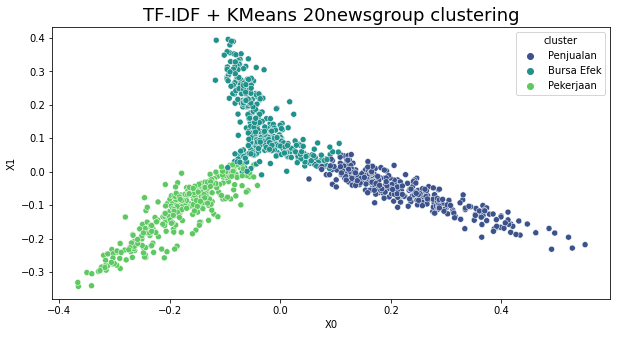

In [241]:
# set image size
plt.figure(figsize=(10, 5))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 10})
plt.ylabel("X1", fontdict={"fontsize": 10})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=jurnal, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

Dapat dilihat bahwa sistem mendeteksi 3 kelompok yang berbeda yaitu Penjualan dengan warna biru tua, Bursa Efek dengan warna hijau ke biruan, dan Pekerjaan dengan warna hijau

# Topik Modeling LSA

LSA merupakan metode yang memanfaatkan model statistik matematis untuk menganalisa struktur semantik suatu teks. LSA bisa digunakan untuk menilai esai dengan mengkonversikan esai menjadi matriks-matriks yang diberi nilai pada masing-masing term untuk dicari kesamaan dengan term referensi.

## Install Library

In [242]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASUS A456UR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Import Library

In [243]:
from sklearn.decomposition import TruncatedSVD

Setelah mengimport library yang dibutuhkan sekarang kita bisa melakukan LSA, namun sebelum melakukan LSA ada tahap untuk pengurungan dimensi agar bisa menemukan topik laten yang menangkap hubungan antara kata dan dokumen, pengurangan dimensi ini bisa dilakukan dengan cara Singular Value Decomposition (SVD) seperti dibawah ini

## Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) adalah teknik pada aljabar linear yang memfaktorkan sembarang matrix menjadi 3 matrix yang berbeda, yaitu:
<ul>
    <li>U = Matrix kolom ortogonal</li>
    <li>V = Matrix baris ortogonal</li>
    <li>S = Satu Singular Matrix</li>
</ul>
Sementara itu ada yang namanya Truncated singular value decomposition (SVD), dimana Truncated SVD merupakan kunci untuk mendapatkan topik dari kumpulan dokumen yang diberikan. Rumus dari Truncated SVD kurang lebih seperti ini $A=U S V^{T}$, dimana :
<ul>
    <li>A mewakili document-term matrix, dengan nilai berbasis hitungan yang ditetapkan di antara setiap dokumen dan pasangan kata. Matrix tersebut memiliki dimensi n x m, dengan n mewakili jumlah dokumen dan m mewakili jumlah kata.</li>
    <li>U mewakili document-topic matrix. Pada dasarnya, nilainya menunjukkan kekuatan hubungan antara setiap dokumen dan topik turunannya. Matriks memiliki n x r dimensi, dengan n mewakili jumlah dokumen dan r mewakili jumlah topik.</li>
    <li>S mewakili matriks diagonal yang mengevaluasi "Strength" setiap topik dalam kumpulan dokumen. Matrix memiliki r x r dimensi, dengan r mewakili jumlah topik.</li>
    <li>V mewakili word-topic matrix. Nilai-nilainya menunjukkan kekuatan asosiasi antara setiap kata dan topik yang diturunkan. Matrix tersebut memiliki dimensi m x r, dengan m mewakili jumlah kata dan r mewakili jumlah topik.</li>
</ul>

![Visualisasi Truncated SVD](visualisasi.png)

In [244]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

print(lsa_top)
print(lsa_top.shape)

[[ 0.32494921 -0.05072706  0.10147945 ...  0.26348577 -0.1322387
   0.02470223]
 [ 0.06506129  0.00303611  0.07600642 ...  0.06568062 -0.04398916
  -0.01552687]
 [ 0.09983554  0.02751372  0.07914103 ...  0.03118981 -0.01749099
  -0.00093815]
 ...
 [ 0.18576094  0.17944265 -0.03389389 ... -0.02146789 -0.00413257
  -0.01971572]
 [ 0.26009898  0.2311449  -0.02423871 ... -0.03238623 -0.07503857
   0.04875503]
 [ 0.18592879  0.18223547 -0.07291245 ...  0.10379249  0.10225726
  -0.00097356]]
(1019, 10)


In [245]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  32.494921340633894
Topic  1  :  -5.072705513928369
Topic  2  :  10.147945263658718
Topic  3  :  -0.35247924376917145
Topic  4  :  -19.461964989913266
Topic  5  :  -3.6659787297103037
Topic  6  :  -12.097287139063875
Topic  7  :  26.34857694567326
Topic  8  :  -13.223869709653293
Topic  9  :  2.470223052033785


In [246]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 8904)
[[ 2.68050456e-03  8.82213809e-05  8.82213809e-05 ...  6.78358245e-04
   2.05914110e-04  2.22486547e-05]
 [-1.08118156e-03  6.63560210e-06  6.63560210e-06 ...  1.91219329e-03
   5.30783733e-04  1.70802950e-05]
 [-7.15435339e-04 -8.14789047e-05 -8.14789047e-05 ... -1.09206337e-03
  -3.78907301e-04 -3.95288150e-05]
 ...
 [ 1.04139370e-03  5.17643617e-05  5.17643617e-05 ...  3.49352296e-05
  -8.04762155e-04 -7.53416776e-07]
 [-1.81550586e-03 -1.55891508e-04 -1.55891508e-04 ... -1.92060451e-03
  -1.56945944e-03 -2.14865995e-04]
 [ 2.57220188e-04  7.75516107e-05  7.75516107e-05 ...  1.97054352e-03
   1.25246526e-04 -6.39989141e-05]]


## Mengekstrak Topic dan Term

Setelah dilakukan Truncated Matrix, sekarang kita dapat melakukan ekstrak topik dokumen. Pada percobaan kali ini, dilakukan extrak sebanyak 10 topik.

In [247]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
kerja karyawan kinerja variabel berpengaruh nilai signifikan perusahaan penelitian positif 

Topic 1: 
perusahaan Ratio saham Return Bursa Efek Perusahaan Equity Indonesia to 

Topic 2: 
keputusan pembelian produk merek konsumen kualitas uji variabel promosi Keputusan 

Topic 3: 
Ratio Equity Return On Debt saham to Earning Per Share 

Topic 4: 
kerja kepuasan saham split stock produktivitas prestasi perusahaan stres Kerja 

Topic 5: 
saham split stock kinerja Tbk return PT karyawan volume harga 

Topic 6: 
Bank Tbk PT Loan LDR CAR NPL ROA rasio keuangan 

Topic 7: 
pegawai split X stock kepuasan saham Kabupaten volume Pegawai LDR 

Topic 8: 
karyawan split stock Loan LDR CAR NPL BOPO ROA saham 

Topic 9: 
ratio debt equity to current asset turnover total split stock 

